In [1]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Simulating Statistics 

In [2]:
united = Table().read_table('united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


### Average time of all delays

In [4]:
np.median(united.column('Delay'))

2.0

### Average time of 10 random delays

In [5]:
np.median(united.sample(10).column('Delay'))

0.0

In [6]:
np.median(united.sample(10).column('Delay'))

-2.0

#### Write a function that given a specified sample size called `size`, returns the statistic we are computing?


The statistic we are computing is the median of the samples

What type is `size` here?

In [7]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay')) 

<details>,
<summary>Solution</summary>
  np.median(united.sample(size).column('Delay'))
</details>


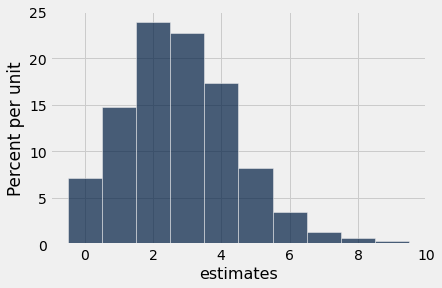

In [8]:
estimates = make_array()
size = 100
for _ in np.arange(1000):
    estimates = np.append(estimates, sample_median(size))
Table().with_column('estimates', estimates).hist()

#### Empirical Distributions Overlayed

In [9]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

num_simulations = 2000

for i in np.arange(num_simulations):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [10]:
sample_medians = Table().with_columns('Size 10', sample_medians_10, 
                                      'Size 100', sample_medians_100,
                                      'Size 1000', sample_medians_1000)

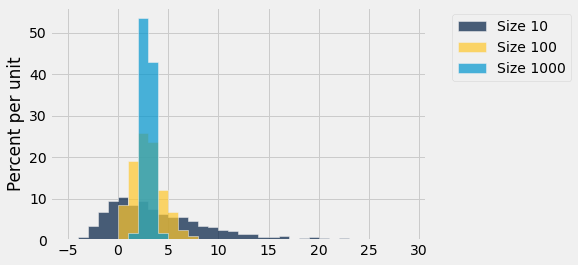

In [11]:
sample_medians.hist(bins = np.arange(-5, 30))

# Swain vs. Alabama


In [12]:
population_proportions = make_array(.26, .74)
population_proportions

array([0.26, 0.74])

In [16]:
sample_proportions(100, population_proportions)

array([0.24, 0.76])

In [20]:
def panel_proportion():
    '''Draws 100 samples from a categorical distribtion
    and returns the precentage of times the drawn sample came from the first category'''
    return sample_proportions(100, population_proportions).item(0)

In [21]:
panel_proportion()

0.38

In [22]:
# this code cell represents our simulation:
# we are simulating the model
# which model? the model of the null hypotheses:

panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

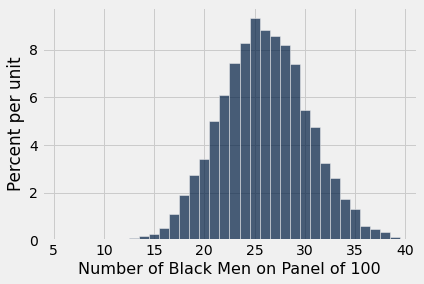

In [23]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

### Where is most of the data?

### What percent of our samples had just 8 black men?

*Hint: area of bin = % of data in our samples in the bin*

### Model Assesment:
Is the data consistent with the model of random sampling from the population of eligible jurors?

(back to slides)

# Mendel's Pea Flowers


In [24]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [25]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([0.73735199, 0.26264801])

In [26]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [27]:
purple_flowers()

76.7491926803014

In [28]:
purple_flowers()

74.27341227125942

In [29]:
purple_flowers()

75.78040904198062

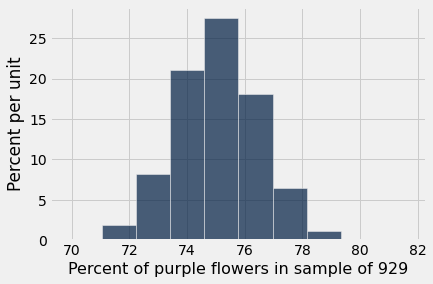

In [30]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

### Let's compute the distance

In [31]:
abs(observed_purples * 100 - 75)

1.318622174381062

In [32]:
observed_purples

0.7631862217438106

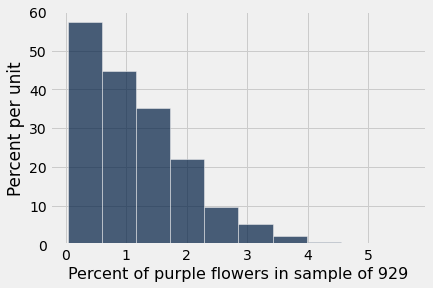

In [36]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    distance = abs(new_purple - 75)
    purples = np.append(purples, distance)
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()